In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
df = pd.read_csv('../data/prpc-all-data.csv',low_memory=False)
print len(df)

5417782


In [5]:
df = df[(df['ws_lat'] >= 28.75510204)]
df = df[(df['ws_lat'] <= 29.69387755)]
df = df[(df['ws_lon'] <= -94.69798658)]
df = df[(df['ws_lon'] >= -96.28187919)]
df = df[(df['d_year'] >= 1987)]
df = df[(df['d_prcp']< 50.00)]
print len(df)
df[:10]

21583


,d_stn,ws_lat,ws_lon,d_da,d_mo,d_year,d_temp,d_dewp,d_slp,d_stp,...,d_min,d_prcp,d_flag_prcp,d_sndp,d_fog,d_rain_drizzle,d_snow_ice_pellets,d_hail,d_thunder,d_tornado_funnel_cloud
9908,722427,29.517,-95.25,3,8,2001,83.2,72.8,1017.7,9999.9,...,75.0,0.29,G,999.9,0,0,0,0,0,0
9909,722427,29.517,-95.25,12,6,2004,83.3,74.6,1014.9,9999.9,...,77.0,0.00,I,999.9,0,0,0,0,0,0
9910,722427,29.517,-95.25,17,6,2003,77.2,71.7,1013.4,9999.9,...,69.1,0.00,A,999.9,0,0,0,0,1,0
9911,722427,29.517,-95.25,11,8,2004,83.5,73.6,1013.8,9999.9,...,75.9,0.00,B,999.9,0,0,0,0,1,0
9912,722427,29.517,-95.25,30,7,2004,83.7,76.1,1011.2,9999.9,...,75.9,0.00,I,999.9,0,0,0,0,1,0
9913,722427,29.517,-95.25,20,8,2004,85.5,75.9,1015.8,9999.9,...,79.0,0.00,A,999.9,0,0,0,0,0,0
9914,722427,29.517,-95.25,25,8,2004,84.7,76.2,1015.6,9999.9,...,75.9,0.00,I,999.9,0,0,0,0,0,0
9915,722427,29.517,-95.25,21,6,2002,82.2,72.6,1021.4,9999.9,...,73.4,0.00,I,999.9,0,0,0,0,1,0
9916,722427,29.517,-95.25,24,8,2002,82.1,74.7,1016.5,9999.9,...,73.9,0.00,A,999.9,0,0,0,0,1,0
9917,722427,29.517,-95.25,2,8,2002,82.7,72.5,1015.7,9999.9,...,73.0,0.00,G,999.9,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21583 entries, 9908 to 5409718
Data columns (total 25 columns):
d_stn                     21583 non-null int64
ws_lat                    21583 non-null float64
ws_lon                    21583 non-null float64
d_da                      21583 non-null int64
d_mo                      21583 non-null int64
d_year                    21583 non-null int64
d_temp                    21583 non-null float64
d_dewp                    21583 non-null float64
d_slp                     21583 non-null float64
d_stp                     21583 non-null float64
d_visib                   21583 non-null float64
d_wdsp                    21583 non-null float64
d_mxpsd                   21583 non-null float64
d_gust                    21583 non-null float64
d_max                     21583 non-null float64
d_min                     21583 non-null float64
d_prcp                    21583 non-null float64
d_flag_prcp               21583 non-null object
d_sndp       

In [7]:
dfsa = df[df['d_prcp']< 99.99]
len(dfsa)

21583

In [8]:
month = {6:'Junho',7:'Julho',8:'Agosto'}
for k,v in month.items():    
    print v

Agosto
Junho
Julho


In [9]:
figsize = (10,6)
margins = {  #     vvv margin in inches
    "left"   :     1.0 / figsize[0],
    "bottom" :     1.0 / figsize[1],
    "right"  :     1.0 / figsize[0],
    "top"    : 1.0  / figsize[1]
}        

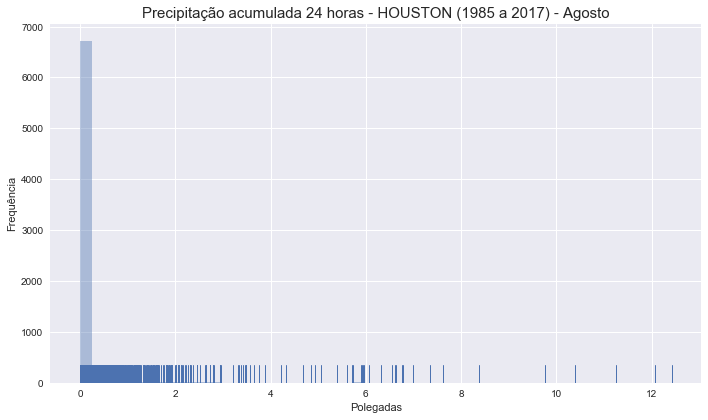

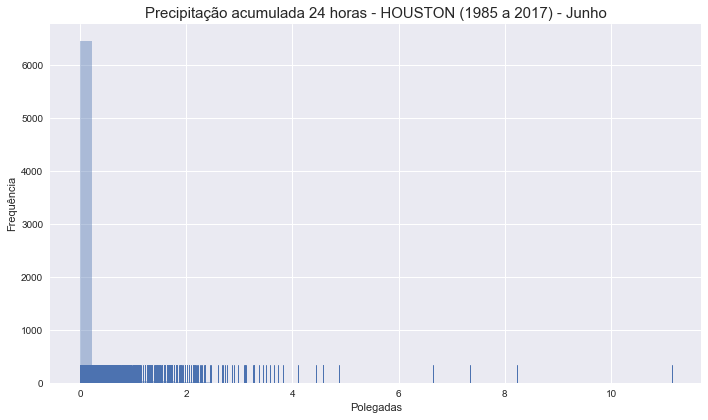

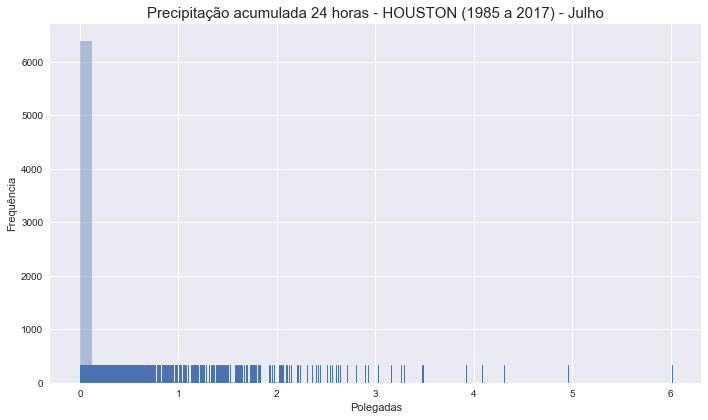

In [10]:
for k,v in month.items():    
    dfm = dfsa[dfsa['d_mo']==k]
    f,ax = plt.subplots(figsize=(10,6)) # set the plot size
    ax.set_title(u'Precipitação acumulada 24 horas - HOUSTON (1985 a 2017) - %s' %month[k])
    ax.title.set_fontsize(15) 
    dist = sns.distplot(a=dfm['d_prcp']
                ,bins = 50
                ,kde=False
                ,ax=ax
                ,rug=True
                ) 
    plt.xlabel(u'Polegadas')
    plt.ylabel(u'Frequência')      
    
    figure = dist.get_figure()  
    figure.tight_layout()    
    figure.savefig('../graphs/dist-%s.png' %month[k].lower(), dpi=200)        

2.02
1.77
1.5981999999999972


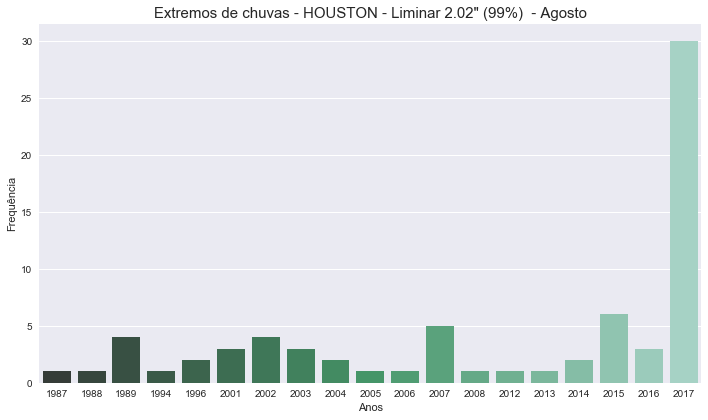

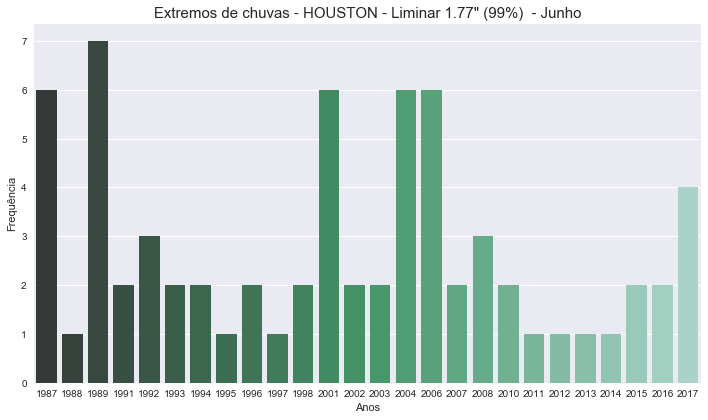

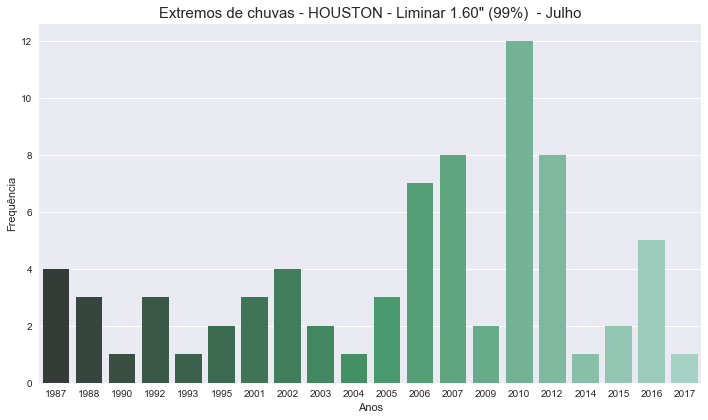

In [11]:
for k,v in month.items():    
    dfm = dfsa[dfsa['d_mo']==k]   
    
    limiar = np.percentile(dfm['d_prcp'], 99) # return 99%th percentile
    print limiar
    
    dfme = dfm[dfm['d_prcp']> limiar]
    
    y = dfme.groupby(['d_year'])['d_prcp'].count()
    x =  y.keys()
    
    f,ax = plt.subplots(figsize=(10,6)) # set the plot size
    ax.set_title(u'Extremos de chuvas - HOUSTON - Liminar {0:.2f}" (99%)  - {1}'.format(limiar,month[k]))
    ax.title.set_fontsize(15) 
    
    bar = sns.barplot(x, y, palette="BuGn_d", ax=ax)
    
    plt.xlabel(u'Anos')
    plt.ylabel(u'Frequência')      
    
    figure = bar.get_figure()
    figure.tight_layout()
    figure.savefig('../graphs/extre-%s.png' %month[k].lower(), dpi=200)  
    